In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [22]:
aData = pd.read_csv("/content/housing_data.csv")

In [23]:
# Pre-processing
aData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [24]:
aData.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
# Checking the null values

aData.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [26]:
aData.shape

(506, 14)

In [27]:
# removing the null values

aData.fillna(aData.mean(), inplace=True)

In [28]:
aData.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [29]:
aData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [30]:
X = aData.drop('MEDV', axis=1)
y = aData['MEDV']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.000000,18.10,0.0,0.6140,5.304,97.300000,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.000000,8.14,0.0,0.5380,5.834,56.500000,4.4986,4,307,21.0,395.62,8.47
332,0.03466,11.211934,6.06,0.0,0.4379,6.031,23.300000,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.000000,18.10,0.0,0.6140,6.103,68.518519,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.000000,8.14,0.0,0.5380,5.727,69.500000,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.000000,8.56,0.0,0.5200,5.836,91.900000,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.000000,6.96,0.0,0.4640,5.856,42.100000,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.000000,2.01,0.0,0.4350,6.635,29.700000,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.000000,18.10,0.0,0.7400,6.629,94.600000,2.1247,24,666,20.2,109.85,23.27


In [33]:
sdTrain = StandardScaler()
sDTest = StandardScaler()

In [34]:
x_train = sdTrain.fit_transform(x_train)
x_test = sDTest.fit_transform(x_test)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [39]:
Linereg = LinearRegression()

In [40]:
Linereg.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred = Linereg.predict(x_test)

In [42]:
y_pred

array([31.59044479, 39.00473838, 16.32319519, 26.67344276, 19.77479019,
       25.01168939, 19.95724128, 16.19877151, 23.57169171, 22.63350137,
       27.67836044, 21.06873599, -5.57629995, 23.6150926 , 20.45053926,
       27.05260322, 21.42787725,  7.01233185, 44.16110141, 18.4505551 ,
       26.73305197, 32.44524175, 13.0171457 , 24.53563987, 18.53745807,
       16.24144571, 22.89760013, 15.80123725, 25.22010568, 21.07188959,
       24.77734808, 26.84989723, 27.41768729, 17.52725827, 17.88267082,
       18.89538164, 33.35260925, 21.46967947, 26.43757825, 24.357713  ,
       16.10602695, 34.50270634, 46.23717025, 19.14142078, 29.83277865,
       17.57178306, 15.45878621, 27.88833149, 21.16696368, 32.76015793,
       23.2704452 , 36.59033509, 17.76717721, 28.04790631, 43.17064739,
       23.34212483, 19.92904508, 34.6772428 , 27.31769225, 14.34191518,
       24.19544905, 32.66739674, 33.48262635, 17.32989488, 21.85138468,
       19.12835431, 21.57649731, 27.89271629, 32.8725076 , 12.52

In [43]:
y_test

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


In [55]:
x_test[:,0]

array([-4.79884372e-01, -4.84650204e-01, -4.78001774e-01, -4.79903252e-01,
        1.94181518e-01, -4.78569520e-01, -4.49340700e-01, -4.53031725e-01,
        5.23447381e-02, -4.62002387e-01, -4.77334234e-01, -4.69330494e-01,
        5.67690208e+00, -4.84647507e-01, -4.53973024e-01,  1.34402283e-01,
       -4.78979484e-01,  1.44073256e+00, -4.90399141e-01,  7.65827864e-01,
       -4.70399907e-01, -4.81502651e-01, -3.39764317e-01, -4.83815442e-01,
        4.54781112e-01,  5.94114953e-01, -4.80951088e-01,  7.90714301e-01,
       -4.68734428e-01, -4.56068696e-01, -4.73497563e-01, -4.69659544e-01,
        2.15215508e+00,  3.77073874e-03,  1.04112142e-01, -2.02430400e-01,
       -4.88581274e-01, -4.87639975e-01, -4.73938544e-01, -4.65911879e-01,
       -4.53207039e-01, -4.85610383e-01, -4.89552242e-01, -4.73983047e-01,
       -4.85944828e-01,  4.46630379e-01, -3.36944465e-01, -4.80359067e-01,
        9.42015302e-02, -4.91409217e-01, -4.76419906e-01, -4.87265074e-01,
       -3.26054795e-01, -

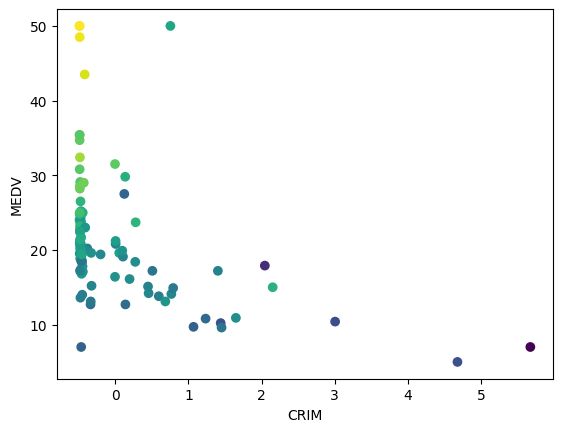

In [57]:
plt.scatter(x_test[:,0],y_test,c=y_pred)
plt.xlabel("CRIM")
plt.ylabel("MEDV")
plt.show()

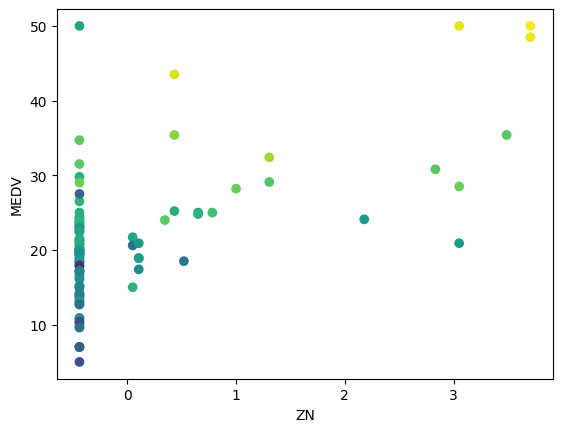

In [59]:
plt.scatter(x_test[:,1],y_test,c=y_pred)
plt.xlabel("ZN")
plt.ylabel("MEDV")
plt.show()

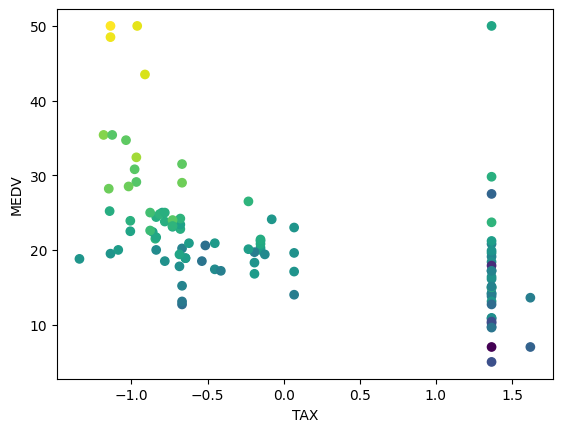

In [60]:
plt.scatter(x_test[:,9],y_test,c=y_pred)
plt.xlabel("TAX")
plt.ylabel("MEDV")
plt.show()

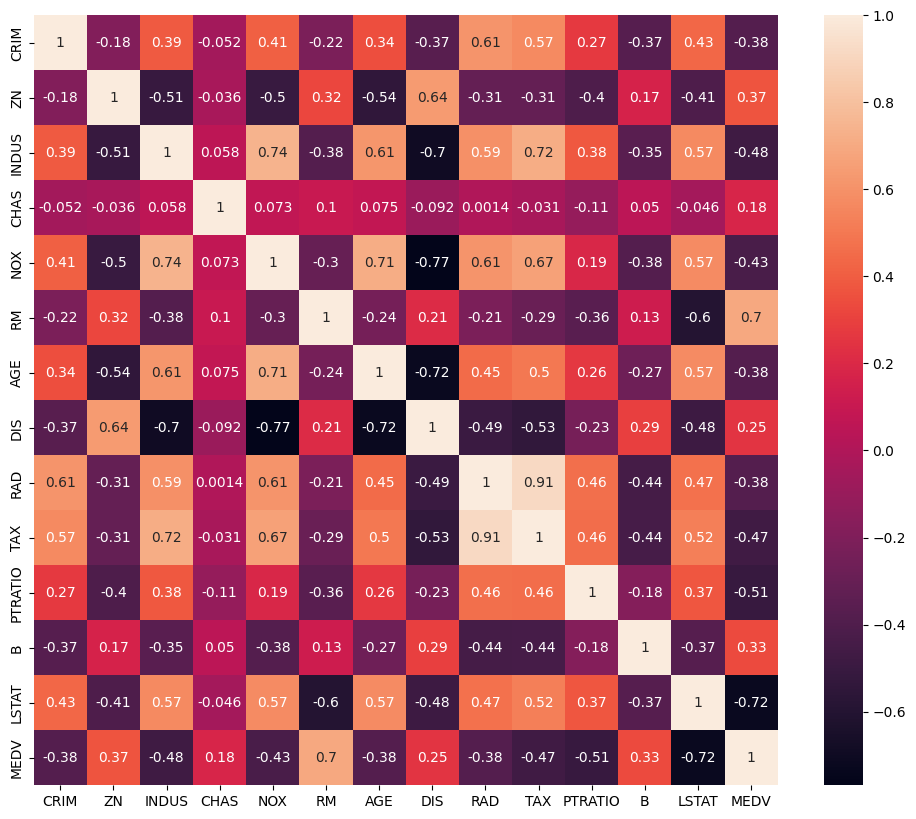

In [76]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(aData.corr(), annot=True, ax=ax)
plt.show()